In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [2]:
df = pd.read_csv('kobe.csv')

In [3]:
df.head(10)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [4]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge (с встроеной регуляризацией) на тех же признаках - построить сравнительную таблицу или график коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. 

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

#### Знакомство с данными

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

Приятный момент - пропущенные значения есть только у целевой переменной, и они сделаны намерено создателями датасета, чтобы отделить часть данных для теста. Нам для обучения моделей нужны размеченные данные, оставим только их.

In [6]:
df_test = df.loc[df.shot_made_flag.isnull(), :] # отделим тестовые данные, вдруг пригодятся
df_test.index = range(len(df_test))


In [7]:
df = df.dropna()
df.index = range(len(df))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           25697 non-null  object 
 16  shot

Посмотрим на описания отдельно числовых и не числовых признаков

In [8]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
1,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
2,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
3,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
4,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [9]:
df.describe(include=['int64', 'float64'])

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [10]:
df.describe(include=['object'])

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697
unique,55,6,20,2,6,7,5,1,1558,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,15836,19710,1924,20285,11289,10532,7857,25697,43,853,1638


 В столбцах team_id и team_name значение одно и то же во всех строках, полезной информации для модели это не несет, значит, их можно удалить. Так же для задачи классификации вряд ли будет полезным идентификатор каждого броска shot_id и идентификатор игрового события game_event_id, эти столбцы тоже удалим.

In [11]:
df = df.drop(['game_event_id', 'shot_id', 'team_id', 'team_name'], axis=1)
df.head()

,action_type,combined_shot_type,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,...,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
0,Jump Shot,Jump Shot,20000012,34.0443,-157,0,-118.4268,10,1,0,...,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR
1,Jump Shot,Jump Shot,20000012,33.9093,-101,135,-118.3708,7,1,0,...,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,20000012,33.8693,138,175,-118.1318,6,1,0,...,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
3,Driving Dunk Shot,Dunk,20000012,34.0443,0,0,-118.2698,6,2,0,...,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR
4,Jump Shot,Jump Shot,20000012,34.0553,-145,-11,-118.4148,9,3,0,...,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR


Посмотрим на распределение значений целевой переменной. 

C:\Users\Polina.DESKTOP-UGBOPLJ\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='shot_made_flag', ylabel='count'>

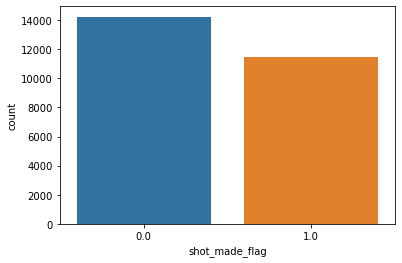

In [12]:
sns.countplot(df['shot_made_flag'])

Нет сильного дисбаланса в сторону одного или другого класса, что хорошо.

Посмотрим на матрицу корреляций

<AxesSubplot:>

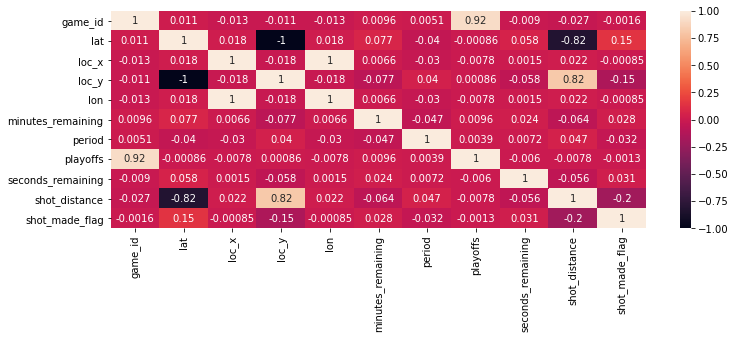

In [13]:
plt.figure(figsize=[12,4])
sns.heatmap(df.corr(), annot=True)

Видим, что коэффициент корреляции у lat и loc_y равен -1, а у lon и loc_x равен 1, т.е. между этими парами признаков есть функциональная зависимость. Соответственно, нет необходимости включать в модель lat и lon вместе с loc_x и loc_y. У этих признаков один смысл - обозначить координаты Коби в момент броска. Оставим в датасете только loc_x и loc_y.

In [14]:
df = df.drop(['lat', 'lon'], axis = 1)

Возможно, впоследствии стоит убрать из модели shot_distance, т.к. этот признак очень сильно завязан на loc_y. Проверим позднее, если его важность невелика, есть смысл его исключить

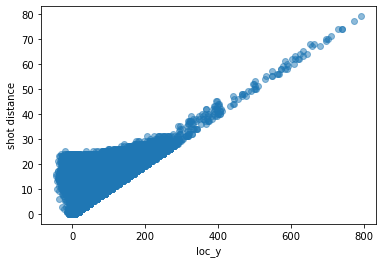

In [15]:
plt.scatter(df.loc_y, df.shot_distance, alpha=0.5)
plt.xlabel('loc_y')
plt.ylabel('shot distance')
plt.show()

Построим график попарных корреляций

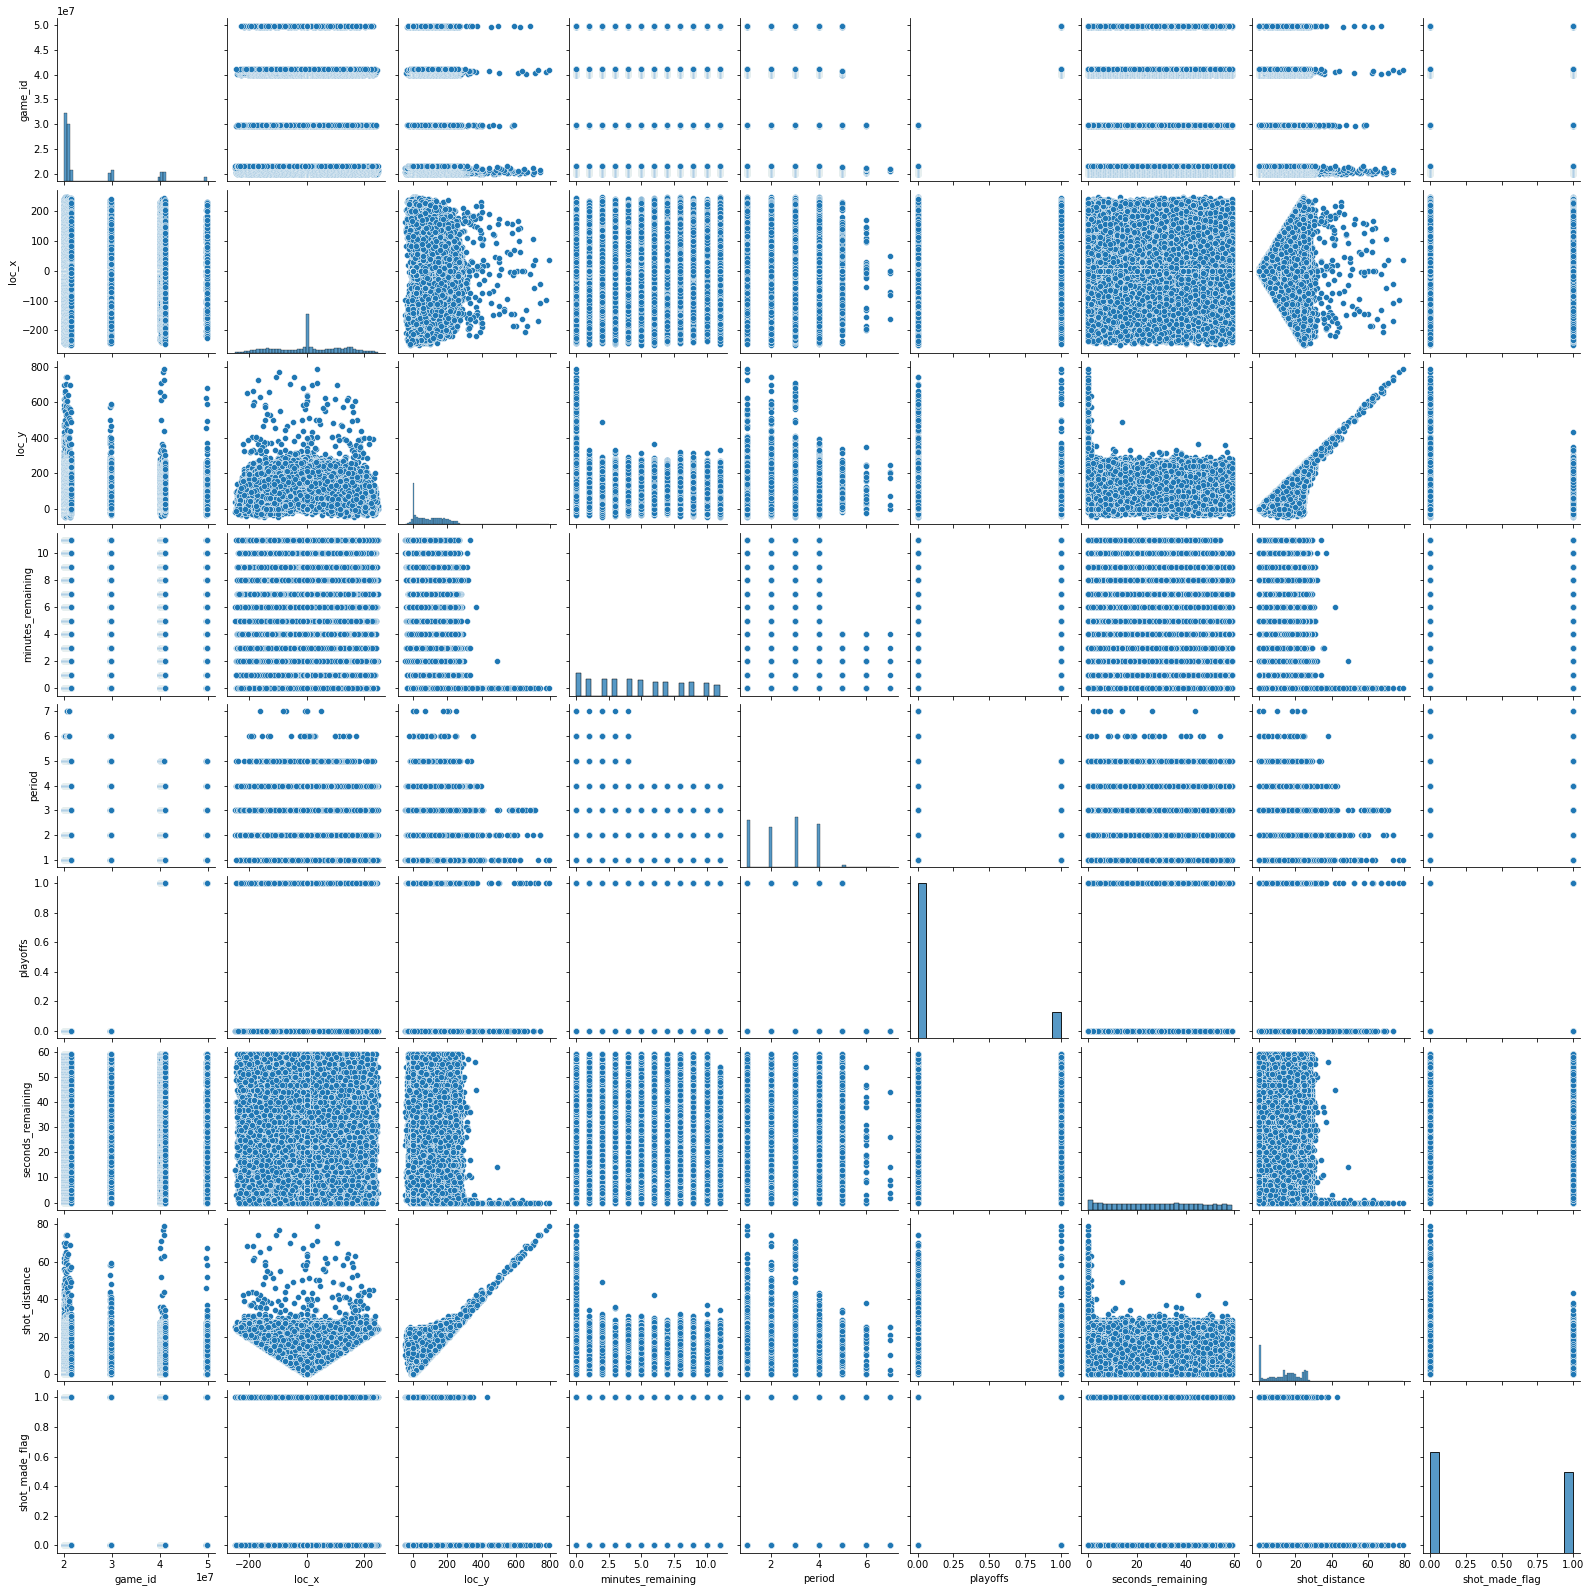

In [16]:
sns.pairplot(df)

Пока что сложно сформулировать какие-либо предварительные гипотезы. Однако можем заметить, что обе переменные координат явно влияют на shot_distance, задавая границы её распеделения. А так же видно, что большинство бросков с особо дальнего расстояния совершается в последние секунды игры (график - соотношение shot_distamce и seconds_remainig)

In [17]:
# разделим признаки на числовые и нечисловые
cat_feat = list(df.dtypes[df.dtypes == object].index)
num_feat = [c for c in df.columns if c not in cat_feat]


In [18]:
import warnings
warnings.filterwarnings('ignore')

Посмотрим на распределения значений числовых признаков, оценим наличие выбросов

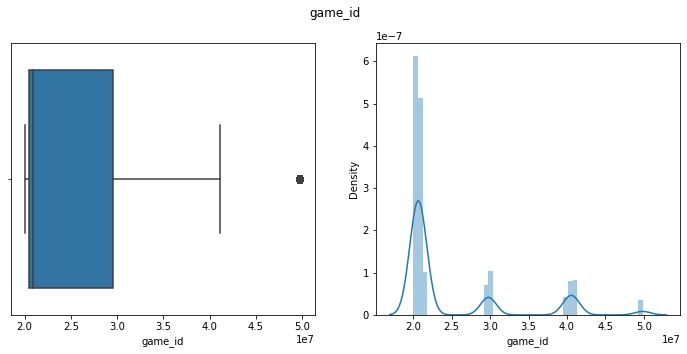

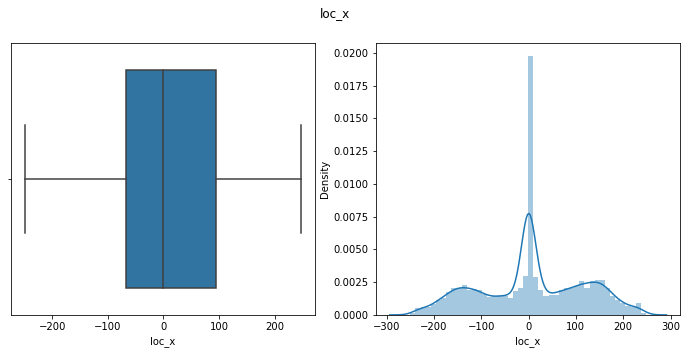

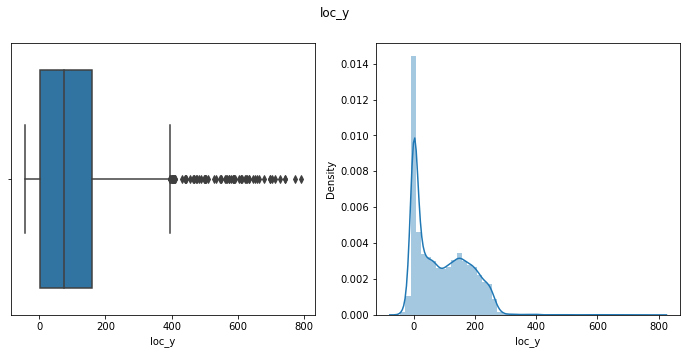

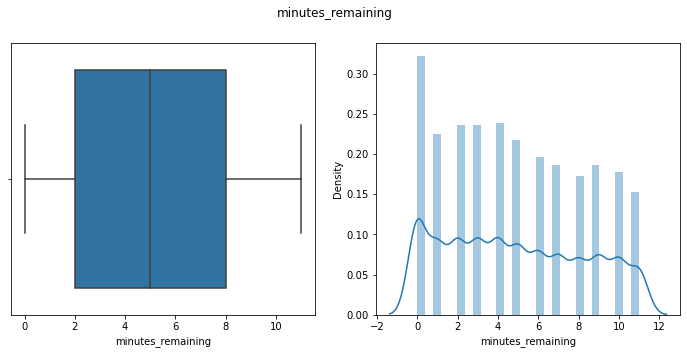

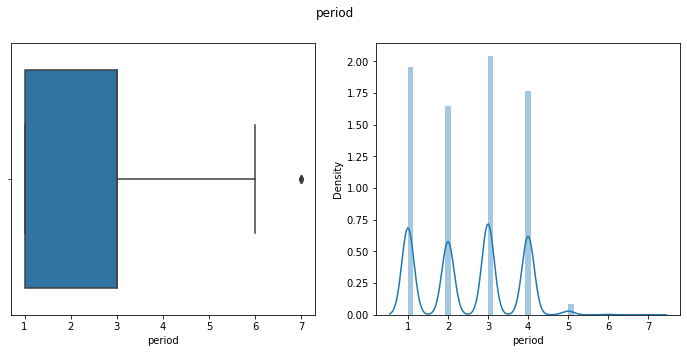

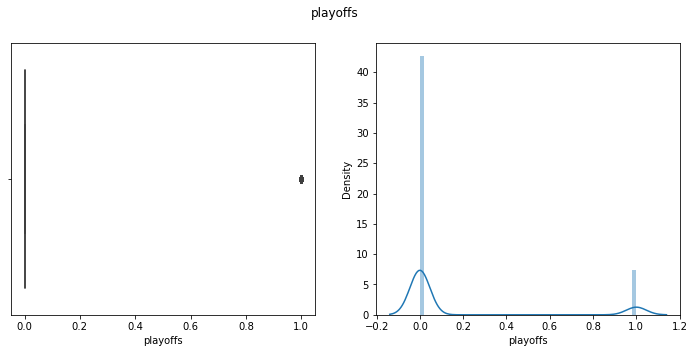

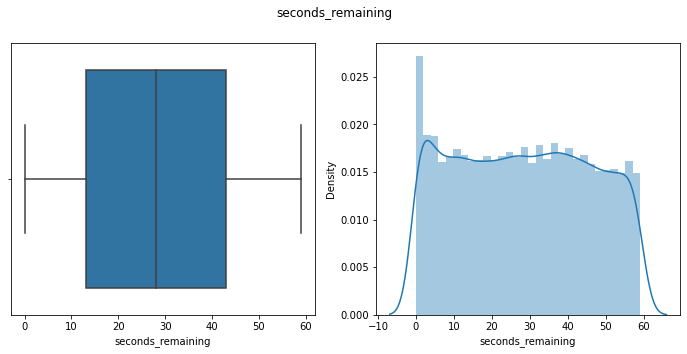

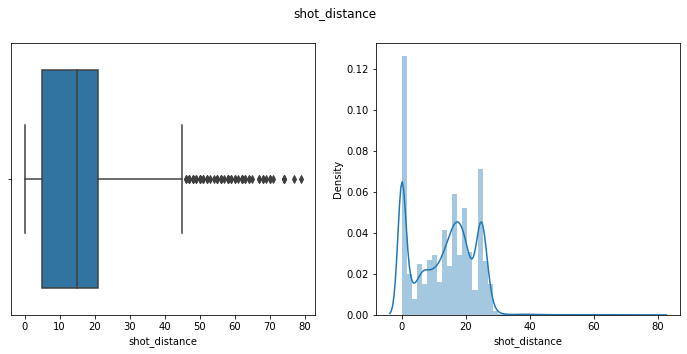

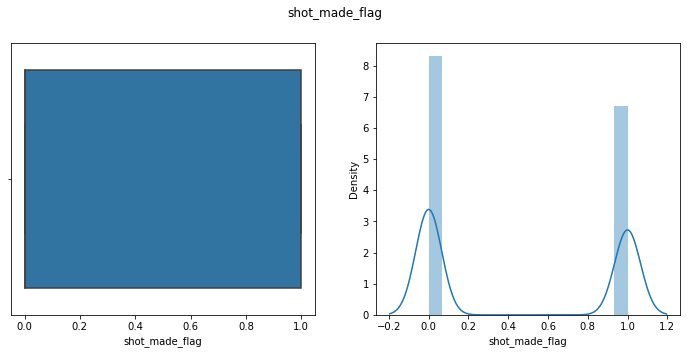

In [19]:
for col in num_feat:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(col)
    sns.boxplot(df[col], ax=ax1)
    sns.distplot(df[col], ax=ax2)

Боксплоты указывают, что выбросы есть у следующих признаков:
* loc_y и shot_distance - два взаимосвязанных параметра с похожим распределением с длинным хвостом справа. Выбросы вряд ли являются ошибочными. Максимальное значение shot_distance = 79 футов (~24 метра) не выходит за рамки габаритов стандартной баскетбольной площадки (28 метров)
* game_id - но это некий числовой идентификатор игры, математические операции над этим признаком производится не будут (по смыслу он близок к категориальному)
* playoffs - бинарный признак с неравномерно распределенными значениями 0 и 1. Здесь 1 не является выбросом
* periods - 7 периодов для стандартного матча из 4 таймов это много, но, возможно, все значения >4 относятся к овертаймам, так что скорее всего это тоже не выброс.

Как итог - очищать датасет от выбросов не требуется

### Исследовательский анализ данных

Построим график, на котором отобразим успешные и неуспешные броски для всех известных пар координат

<AxesSubplot:xlabel='loc_x', ylabel='loc_y'>

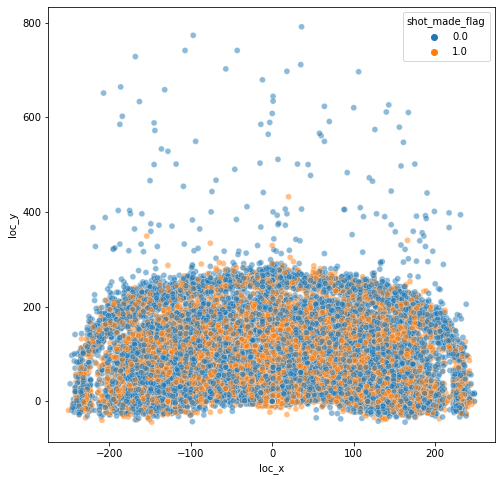

In [20]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df.loc_x, y=df.loc_y, hue=df.shot_made_flag, alpha=0.5)


Очевидно, с дальнего расстояния большинство бросков не являются удачными. Но в зоне, близкой к кольцу, и удачных, и неудачных попыток броска было сделано много, так что сложно сказать, что расстояние здесь во многом определяет исход броска   

Посмотрим на результативность в зависимости от типа броска

In [21]:
df_act = df.groupby('action_type').agg({'shot_made_flag': 'mean'}).reset_index()
df_act = df_act.sort_values('shot_made_flag', ascending=False)
df_act.head()

,action_type,shot_made_flag
52,Turnaround Finger Roll Shot,1.0
44,Running Slam Dunk Shot,1.0
21,Hook Bank Shot,1.0
34,Reverse Slam Dunk Shot,1.0
7,Driving Floating Bank Jump Shot,1.0


<AxesSubplot:xlabel='shot_made_flag', ylabel='action_type'>

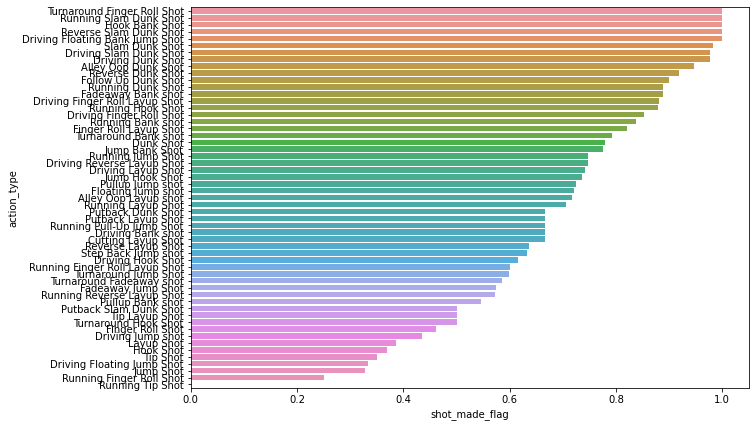

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(df_act.shot_made_flag, df_act.action_type, orient='h')

In [23]:
df.action_type.value_counts()

Jump Shot                          15836
Layup Shot                          2154
Driving Layup Shot                  1628
Turnaround Jump Shot                 891
Fadeaway Jump Shot                   872
Running Jump Shot                    779
Pullup Jump shot                     402
Turnaround Fadeaway shot             366
Slam Dunk Shot                       334
Reverse Layup Shot                   333
Jump Bank Shot                       289
Driving Dunk Shot                    257
Dunk Shot                            217
Tip Shot                             151
Step Back Jump shot                  106
Alley Oop Dunk Shot                   95
Floating Jump shot                    93
Driving Reverse Layup Shot            83
Hook Shot                             73
Driving Finger Roll Shot              68
Alley Oop Layup shot                  67
Reverse Dunk Shot                     61
Driving Finger Roll Layup Shot        59
Turnaround Bank shot                  58
Running Layup Sh

Наиболее результативными оказывались типы бросков, которые во всем датасете встречаются редко. Например, все Turnaround Finger Roll Shot были успешны, но их общее количесво = 2.Тогда как частота успехов у самых распространенных Jump Shot и Layup Shot составляет менее 0,4.  

<AxesSubplot:xlabel='shot_made_flag', ylabel='combined_shot_type'>

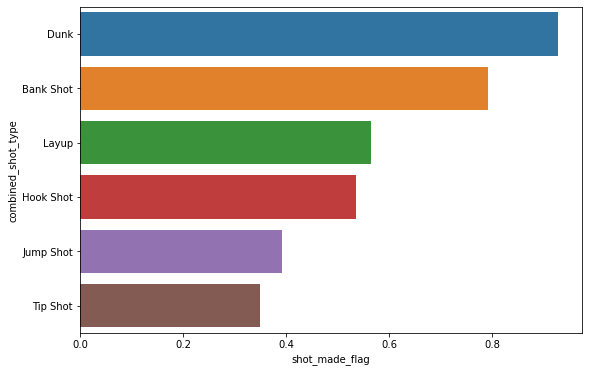

In [24]:
df_comb = df.groupby('combined_shot_type').agg({'shot_made_flag': 'mean'}).reset_index()
df_comb = df_comb.sort_values('shot_made_flag', ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(df_comb.shot_made_flag, df_comb.combined_shot_type, orient='h')

In [25]:
df.combined_shot_type.value_counts()

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

Если посмотрим на результативность в разрезе более крупных категорий видов бросков, то увидим похожую картину: самые частые броски не слишком результативны, самых результативных бросков существенно меньше чем бросков из самой распространенной категории.

Посмотрим на результативность в разрезе сыгранных сезонов

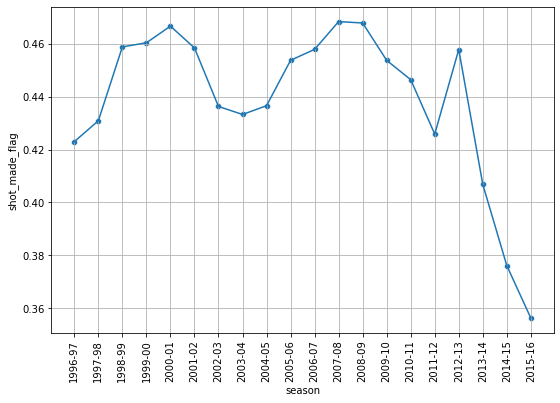

In [26]:
df_season = df.groupby("season").agg({"shot_made_flag": "mean"})

plt.figure(figsize=(9,6))
sns.lineplot(x="season", y="shot_made_flag", data=df_season)
sns.scatterplot(x="season", y="shot_made_flag", data=df_season)
plt.grid()
plt.xticks(rotation=90);

В начале видим два похожих паттерна: 4 сезона подряд рост точности, 3-4 сезона - её спад. Но с 2011 года закономерность нарушается, идет 1 сезон роста результативности, а потом резкий спад в течение трех сезонов 

<Figure size 432x432 with 0 Axes>

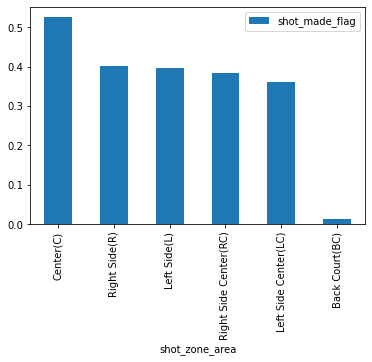

<Figure size 432x432 with 0 Axes>

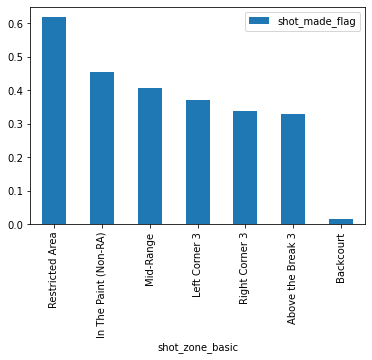

<Figure size 432x432 with 0 Axes>

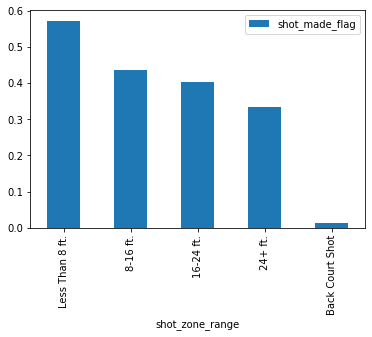

In [27]:
cols = ['shot_zone_area', 'shot_zone_basic', 'shot_zone_range']

for col in cols:
    df_col = df.groupby(col).agg({"shot_made_flag": "mean"})
    df_col = df_col.sort_values('shot_made_flag', ascending=False)

    plt.figure(figsize=(6,6))
    df_col.plot(kind='bar')
    plt.show()
    

На графиках зависимости результативности от различных зон площадки видно, что наиболее результативные броски были совершены с наименьшего расстояния, из центральной зоны и из зоны из под кольца, что в целом достаточно ожидаемо. Но как мы помним из графика с координатами успешных и неуспешных бросков, в зонах, близких к кольцу кучность и тех и других велика, и нельзя говорить о какой-то однозначной закономерности

На этапе знакомства с данными можно предположить, что важными составляющими анализа будут расстояние и/или координаты броска, его тип, зона, из которой бросок был сделан. Дальнейший анализ покажет, какие признаки наоборот менее важны и могут быть откинуты до начала обучения модели 


### Работа с признаками: кодирование категориальных, генерация новых

In [28]:
cat_feat

['action_type',
 'combined_shot_type',
 'season',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'game_date',
 'matchup',
 'opponent']

Вот список переменных, которые предстоит преобразовать

Дату можно перевести из объекта типа данных object неопсредственно в дату, и выделить из нее, например год, время года, месяц. Возможно, это покажет некоторую сезонность поведения Коби Брайанта

In [29]:
df_upd = df.copy()


In [30]:
df_upd['game_date'] = pd.to_datetime(df_upd['game_date'])
df_upd['game_year'] = df_upd['game_date'].dt.year
df_upd['game_month'] = df_upd['game_date'].dt.month
df_upd


,action_type,combined_shot_type,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent,game_year,game_month
0,Jump Shot,Jump Shot,20000012,-157,0,10,1,0,2000-01,22,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR,2000,10
1,Jump Shot,Jump Shot,20000012,-101,135,7,1,0,2000-01,45,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR,2000,10
2,Jump Shot,Jump Shot,20000012,138,175,6,1,0,2000-01,52,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR,2000,10
3,Driving Dunk Shot,Dunk,20000012,0,0,6,2,0,2000-01,19,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR,2000,10
4,Jump Shot,Jump Shot,20000012,-145,-11,9,3,0,2000-01,32,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR,2000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25692,Driving Layup Shot,Layup,49900088,0,0,7,4,1,1999-00,4,...,0.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-06-19,LAL vs. IND,IND,2000,6
25693,Jump Shot,Jump Shot,49900088,1,48,6,4,1,1999-00,5,...,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,2000-06-19,LAL vs. IND,IND,2000,6
25694,Running Jump Shot,Jump Shot,49900088,-134,166,3,4,1,1999-00,28,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-06-19,LAL vs. IND,IND,2000,6
25695,Jump Shot,Jump Shot,49900088,31,267,2,4,1,1999-00,10,...,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,2000-06-19,LAL vs. IND,IND,2000,6


In [31]:
def get_time_of_year(month):
    t_y = None
    if month in [1, 2, 12]:
        t_y = 1
    elif month in [3, 4, 5]:
        t_y = 2
    elif month in [6, 7, 8]:
        t_y = 3
    elif month in [9, 10, 11]:
        t_y = 4
    return t_y
    
    

In [32]:
df_upd.loc[:, 'game_time_of_year'] = df_upd['game_month'].apply(get_time_of_year)
df_upd.head()

,action_type,combined_shot_type,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent,game_year,game_month,game_time_of_year
0,Jump Shot,Jump Shot,20000012,-157,0,10,1,0,2000-01,22,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR,2000,10,4
1,Jump Shot,Jump Shot,20000012,-101,135,7,1,0,2000-01,45,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR,2000,10,4
2,Jump Shot,Jump Shot,20000012,138,175,6,1,0,2000-01,52,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR,2000,10,4
3,Driving Dunk Shot,Dunk,20000012,0,0,6,2,0,2000-01,19,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR,2000,10,4
4,Jump Shot,Jump Shot,20000012,-145,-11,9,3,0,2000-01,32,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR,2000,10,4


In [33]:
df_upd = df_upd.drop("game_date", axis=1)

Смотрим, сколько у нас уникальных значений в каждой из категориальных переменных, чтобы определить целесообразность one hot encoding

In [34]:
cat_feat.remove('game_date')

In [35]:
df_upd[cat_feat].nunique()

action_type           55
combined_shot_type     6
season                20
shot_type              2
shot_zone_area         6
shot_zone_basic        7
shot_zone_range        5
matchup               74
opponent              33
dtype: int64

Признаки, в которых <=20 значений без особых проблем могут быть переведены one hot encoding-ом в числовые. Но признаки action_type или matchup хочется как-то преобразовать, т.к. они дадут слишком разреженные новые вектора значений 

In [36]:
df_actions = df_upd[['action_type', 'game_id']].groupby('action_type').size().reset_index(name='counts').sort_values('counts')
df_actions

,action_type,counts
44,Running Slam Dunk Shot,1
7,Driving Floating Bank Jump Shot,1
45,Running Tip Shot,1
31,Putback Slam Dunk Shot,2
48,Tip Layup Shot,2
52,Turnaround Finger Roll Shot,2
8,Driving Floating Jump Shot,3
3,Driving Bank shot,3
29,Putback Dunk Shot,3
42,Running Pull-Up Jump Shot,3


In [37]:
rare_actions = df_actions[df_actions.counts<50].action_type.to_list()

Здесь много уникальных приемов, которые из ~25000 наблюдений были использованы всего несколько раз или несколько десятков раз. Отнесем все приемы, которые были совершены менее 50 раз к новой категории Other shots

In [38]:
df_upd.loc[df_upd['action_type'].isin(rare_actions), 'action_type'] = "Other shots"

In [39]:
df_upd.action_type.nunique()

26

Количество категорий уменьшилось примерно вдвое

In [40]:
df_upd.matchup.unique()

array(['LAL @ POR', 'LAL vs. UTA', 'LAL @ VAN', 'LAL vs. LAC',
       'LAL @ HOU', 'LAL @ SAS', 'LAL vs. HOU', 'LAL vs. DEN',
       'LAL @ SAC', 'LAL @ DEN', 'LAL vs. CHI', 'LAL vs. GSW',
       'LAL vs. MIN', 'LAL @ LAC', 'LAL vs. IND', 'LAL @ SEA',
       'LAL vs. SAS', 'LAL vs. DAL', 'LAL vs. PHI', 'LAL @ GSW',
       'LAL vs. SEA', 'LAL vs. DET', 'LAL vs. MIL', 'LAL vs. VAN',
       'LAL @ TOR', 'LAL @ MIA', 'LAL @ DAL', 'LAL vs. POR', 'LAL @ PHX',
       'LAL vs. CLE', 'LAL @ UTA', 'LAL vs. MIA', 'LAL vs. NJN',
       'LAL @ NYK', 'LAL @ CLE', 'LAL @ MIN', 'LAL vs. CHH',
       'LAL vs. SAC', 'LAL vs. PHX', 'LAL @ NJN', 'LAL @ PHI',
       'LAL @ CHH', 'LAL @ IND', 'LAL vs. TOR', 'LAL @ DET', 'LAL @ WAS',
       'LAL @ ORL', 'LAL @ ATL', 'LAL @ MIL', 'LAL vs. NYK',
       'LAL vs. MEM', 'LAL vs. ORL', 'LAL @ MEM', 'LAL @ CHI',
       'LAL vs. WAS', 'LAL vs. ATL', 'LAL vs. BOS', 'LAL @ BOS',
       'LAL vs. NOH', 'LAL @ NOH', 'LAL @ UTH', 'LAL vs. SAN',
       'LAL @ NOK', 'LAL @ 

Признак matchup содержит информацию об оппоненте, а так же об 1 из 2 вариантов матча с одним и тем же противником, судя по обозначениям vs и @. Т.к. оппонент у нас уже указан в другом столбце, можно добавить новый бинарный признак, соответствующий vs и @, а matchup убрать

In [41]:
df_upd['match_kind'] = df_upd['matchup'].str.contains('vs').astype('int')
df_upd = df_upd.drop('matchup', axis=1)

In [42]:
df_upd.head()

,action_type,combined_shot_type,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,game_year,game_month,game_time_of_year,match_kind
0,Jump Shot,Jump Shot,20000012,-157,0,10,1,0,2000-01,22,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2000,10,4,0
1,Jump Shot,Jump Shot,20000012,-101,135,7,1,0,2000-01,45,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,2000,10,4,0
2,Jump Shot,Jump Shot,20000012,138,175,6,1,0,2000-01,52,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,2000,10,4,0
3,Driving Dunk Shot,Dunk,20000012,0,0,6,2,0,2000-01,19,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,2000,10,4,0
4,Jump Shot,Jump Shot,20000012,-145,-11,9,3,0,2000-01,32,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2000,10,4,0


In [43]:
df_upd.drop('game_id', axis=1, inplace=True)

На минуту отвлечемся от категориальных переменных. У нас есть два признака minutes_remaining и seconds_remaining, характеризующие время, оставшееся до окончания игры. Для удобства вместо этих двух признаков создадим один общий time_remaining, который будет отражать общее время в секундах до окончания игры

In [44]:
df_upd['time_remaining'] = 60 * df_upd['minutes_remaining'] + df_upd['seconds_remaining']

Так же в самом начале, рассматривая pairplot мы видели, что в последние секунды возрастает количество бросков с дальнего расстояния - т.е. в целом меняется тактика игры: рискнуть, но попытаться что-то сделать, из-за чего возрастает количество неточных бросков. Попробуем ввести новый бинарный признак last_3_seconds со значениями 1, если осталось <= 3 секунд до конца, и 0 в остальных случаях. Возможно, он окажется полезен. 

In [45]:
df_upd['last_3_seconds'] = (df_upd['time_remaining']<=3).astype('int')

In [46]:
df_upd.drop(['minutes_remaining', 'seconds_remaining'], axis=1, inplace=True)

In [47]:
df_upd.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,game_year,game_month,game_time_of_year,match_kind,time_remaining,last_3_seconds
0,Jump Shot,Jump Shot,-157,0,1,0,2000-01,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2000,10,4,0,622,0
1,Jump Shot,Jump Shot,-101,135,1,0,2000-01,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,2000,10,4,0,465,0
2,Jump Shot,Jump Shot,138,175,1,0,2000-01,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,2000,10,4,0,412,0
3,Driving Dunk Shot,Dunk,0,0,2,0,2000-01,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,2000,10,4,0,379,0
4,Jump Shot,Jump Shot,-145,-11,3,0,2000-01,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2000,10,4,0,572,0


Закодируем оставшиеся катеориальные переменные с помощью one hot encoding

In [48]:
cat_feat.remove('matchup')

In [49]:
for cat in cat_feat:
    dummies = pd.get_dummies(df_upd[cat])
    dummies = dummies.add_prefix("{}_".format(cat))
    df_upd.drop(cat, axis=1, inplace=True)
    df_upd = df_upd.join(dummies)

In [50]:
df_upd.head()

,loc_x,loc_y,period,playoffs,shot_distance,shot_made_flag,game_year,game_month,game_time_of_year,match_kind,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,-157,0,1,0,15,0.0,2000,10,4,0,...,0,0,1,0,0,0,0,0,0,0
1,-101,135,1,0,16,1.0,2000,10,4,0,...,0,0,1,0,0,0,0,0,0,0
2,138,175,1,0,22,0.0,2000,10,4,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,0,0,1.0,2000,10,4,0,...,0,0,1,0,0,0,0,0,0,0
4,-145,-11,3,0,14,0.0,2000,10,4,0,...,0,0,1,0,0,0,0,0,0,0


Таким образом в нашем датасете стало 117 признаков

### Обучение моделей

Необходимо сравнить 3 модели, обычную, Lasso и Ridge. Т.к. здесь речь идет о классификации, будем использовать логистическую регрессию с различными настройками penalty

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

In [52]:
X = df_upd.drop('shot_made_flag', axis=1)
Y = df_upd['shot_made_flag']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=146)

In [117]:
pipe_logr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, penalty='none'))
pipe_logr_l1 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', C=0.3))
pipe_logr_l2 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, penalty='l2', C=0.3))

In [118]:
pipe_logr.fit(x_train, y_train)
pipe_logr_l1.fit(x_train, y_train)
pipe_logr_l2.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.3, max_iter=1000))])

In [119]:
print(f'Score без регуляризации: {pipe_logr.score(x_test, y_test)}')
print(f'Score при l1 регуляризации: {pipe_logr_l1.score(x_test, y_test)}')
print(f'Score при l2 регуляризации: {pipe_logr_l2.score(x_test, y_test)}')

Score без регуляризации: 0.6778210116731518
Score при l1 регуляризации: 0.6784695201037614
Score при l2 регуляризации: 0.6776913099870299


In [120]:
feat_list = list(X.columns)
coef_lr = pipe_logr.named_steps['logisticregression'].coef_[0]
coef_lr_l1 = pipe_logr_l1.named_steps['logisticregression'].coef_[0]
coef_lr_l2 = pipe_logr_l2.named_steps['logisticregression'].coef_[0]

In [121]:
df_coef = pd.DataFrame(data=np.array([feat_list, coef_lr, coef_lr_l1, coef_lr_l2]).T, columns=['feature', 'no_reg', 'l1', 'l2'])

In [122]:
df_coef.head(10)

,feature,no_reg,l1,l2
0,loc_x,-0.03462689390120679,-0.019666780132588192,-0.03342077313019165
1,loc_y,-0.0001062877168191756,0.008614859499786163,0.0016456832750638237
2,period,-0.0691775529705191,-0.06785960766662369,-0.06901429769061755
3,playoffs,0.016659365292924732,-0.001142939667297047,-9.165555011355275e-05
4,shot_distance,0.14133563345333197,0.08873683018775376,0.13585114028817466
5,game_year,-1.0053745916380206,-0.05958989490185372,-0.20040945337255647
6,game_month,-0.08681023942348128,-0.0021986326282097744,-0.015083417392585221
7,game_time_of_year,-0.020991199984751015,-0.019587579515377717,-0.020030826991920908
8,match_kind,0.010559220913082399,0.009878272305318053,0.010621262778155107
9,time_remaining,0.027888135161718047,0.027208694450657777,0.027969863308431323


In [124]:
df_coef['no_reg'] = df_coef['no_reg'].astype(float)
df_coef['l1'] = df_coef['l1'].astype(float)
df_coef['l2'] = df_coef['l2'].astype(float)

Т.к. данные были предварительно отмасштабированы, вес коэффициента горвит о важности признака, при котором этот коэффициент.

In [125]:
df_coef[df_coef.no_reg==0]

,feature,no_reg,l1,l2


Модель без регуляризации не занулила ни один коэффициент. В таблице ниже признаки, которые вносят наибольший положительный и наибольший отрицательный вклад:

In [126]:
df1 = pd.concat([df_coef.sort_values('no_reg', ascending=False).head(), df_coef.sort_values('no_reg', ascending=False).tail()])[['feature','no_reg']]
df1

,feature,no_reg
33,action_type_Tip Shot,1.013183
38,combined_shot_type_Dunk,0.513564
16,action_type_Driving Layup Shot,0.308784
59,season_2012-13,0.291699
62,season_2015-16,0.265102
46,season_1999-00,-0.266071
44,season_1997-98,-0.348652
23,action_type_Jump Shot,-0.522689
5,game_year,-1.005375
42,combined_shot_type_Tip Shot,-1.076634


In [127]:
df_coef[df_coef.l1==0]

,feature,no_reg,l1,l2
11,action_type_Alley Oop Dunk Shot,0.009358,0.0,0.021932
32,action_type_Step Back Jump shot,0.016163,0.0,0.023813
33,action_type_Tip Shot,1.013183,0.0,0.192964
40,combined_shot_type_Jump Shot,0.021833,0.0,-0.057656
41,combined_shot_type_Layup,-0.078995,0.0,-0.126995
45,season_1998-99,-0.242127,0.0,-0.034763
49,season_2002-03,-0.174116,0.0,-0.023466
57,season_2010-11,0.209154,0.0,0.033399
59,season_2012-13,0.291699,0.0,0.045207
67,shot_zone_area_Left Side Center(LC),0.004615,0.0,0.002299


Модель с l1-регуляризацией занулила коэффициенты при 15 признаках.  

Признаки, внесшие наибольший положительный и отрицательный вклады ниже: 

In [128]:
df2 = pd.concat([df_coef.sort_values('l1', ascending=False).head(), df_coef.sort_values('l1', ascending=False).tail()])[['feature','l1']]
df2

,feature,l1
38,combined_shot_type_Dunk,0.489189
16,action_type_Driving Layup Shot,0.186815
13,action_type_Driving Dunk Shot,0.124276
31,action_type_Slam Dunk Shot,0.121865
29,action_type_Running Jump Shot,0.096285
18,action_type_Dunk Shot,-0.150097
82,shot_zone_range_Less Than 8 ft.,-0.189192
81,shot_zone_range_Back Court Shot,-0.211952
24,action_type_Layup Shot,-0.237716
23,action_type_Jump Shot,-0.645642


In [129]:
df_coef[df_coef.l2==0]

,feature,no_reg,l1,l2


Модель с l2-регуляризацией не занулила ни один коэффициент.

Признаки, внесшие наибольший положительный и отрицательный вклады:

In [130]:
df3=pd.concat([df_coef.sort_values('l2', ascending=False).head(), df_coef.sort_values('l2', ascending=False).tail()])[['feature','l2']]
df3

,feature,l2
38,combined_shot_type_Dunk,0.459342
16,action_type_Driving Layup Shot,0.321561
33,action_type_Tip Shot,0.192964
31,action_type_Slam Dunk Shot,0.171482
13,action_type_Driving Dunk Shot,0.169662
65,shot_zone_area_Back Court(BC),-0.134588
10,last_3_seconds,-0.146410
5,game_year,-0.200409
42,combined_shot_type_Tip Shot,-0.258326
23,action_type_Jump Shot,-0.462881


Наиболее важные признаки, встречающиеся во всех моделях

In [131]:
set(df1['feature'])&set(df2['feature'])&set(df3['feature'])

{'action_type_Driving Layup Shot',
 'action_type_Jump Shot',
 'combined_shot_type_Dunk'}

Общий список признаков по 3м моделям

In [132]:
set(df1['feature'])|set(df2['feature'])|set(df3['feature'])

{'action_type_Driving Dunk Shot',
 'action_type_Driving Layup Shot',
 'action_type_Dunk Shot',
 'action_type_Jump Shot',
 'action_type_Layup Shot',
 'action_type_Running Jump Shot',
 'action_type_Slam Dunk Shot',
 'action_type_Tip Shot',
 'combined_shot_type_Dunk',
 'combined_shot_type_Tip Shot',
 'game_year',
 'last_3_seconds',
 'season_1997-98',
 'season_1999-00',
 'season_2012-13',
 'season_2015-16',
 'shot_zone_area_Back Court(BC)',
 'shot_zone_range_Back Court Shot',
 'shot_zone_range_Less Than 8 ft.'}

Ожидаемо увидеть здесь наиболее типичные виды бросков, переменную loc_y, описывающую положение в пространстве. Интересно, что в список попал признак game_year и last_3_seconds, которые были сгенерирован нами на этапе подготовки данных.



#### ROC AUC

In [136]:
y_pred1 = pipe_logr.predict(x_test)
y_pred2 = pipe_logr_l1.predict(x_test)
y_pred3 = pipe_logr_l2.predict(x_test)

In [137]:
roc_auc_m1 = roc_auc_score(y_test, y_pred1)
roc_auc_m2 = roc_auc_score(y_test, y_pred2)
roc_auc_m3 = roc_auc_score(y_test, y_pred3)

In [138]:
print(f'ROC AUC score без регуляризации: {roc_auc_m1}')
print(f'ROC AUC score при l1 регуляризации: {roc_auc_m2}')
print(f'ROC AUC score при l2 регуляризации: {roc_auc_m3}')

ROC AUC score без регуляризации: 0.6556985748492692
ROC AUC score при l1 регуляризации: 0.6564797236157103
ROC AUC score при l2 регуляризации: 0.6555813140612767


### PCA

In [146]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'cumulative explained variance')

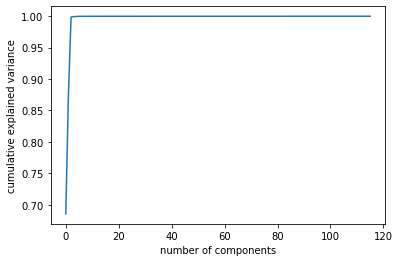

In [154]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Где-то на промежутке до 10 компонент происходит резкий скачок роста объясненной дисперсии

In [155]:
for i in range(1, 11):
    print(f'components: {i}, explained variance ratio: {sum(pca.explained_variance_ratio_[:i])}')

components: 1, explained variance ratio: 0.6852740760431978
components: 2, explained variance ratio: 0.8764125295219556
components: 3, explained variance ratio: 0.9987924286817318
components: 4, explained variance ratio: 0.999260996817669
components: 5, explained variance ratio: 0.9996206889599653
components: 6, explained variance ratio: 0.999895402127419
components: 7, explained variance ratio: 0.9999162859529135
components: 8, explained variance ratio: 0.9999301682324644
components: 9, explained variance ratio: 0.99994114200404
components: 10, explained variance ratio: 0.9999468119013725


In [156]:
pca.components_

array([[ 5.13401153e-03, -4.21625878e-02, -2.58978900e-04, ...,
        -4.24310339e-06, -1.39925228e-06, -2.68173427e-06],
       [-9.99292099e-01,  3.68768740e-02,  3.20330568e-04, ...,
         1.86042246e-05,  5.01825603e-06, -1.74736243e-05],
       [ 3.69902867e-02,  9.94562213e-01,  4.44535257e-04, ...,
         1.70603223e-05, -9.14377573e-06, -1.17676554e-05],
       ...,
       [ 0.00000000e+00, -3.52365706e-18,  1.26764281e-16, ...,
         1.92992419e-02,  1.92992419e-02,  1.92992419e-02],
       [-0.00000000e+00, -2.52077005e-18,  2.32022646e-16, ...,
        -1.31883559e-02, -1.31883559e-02, -1.31883559e-02],
       [ 0.00000000e+00,  8.53809211e-19,  7.41200303e-17, ...,
        -7.08254520e-02, -7.08254520e-02, -7.08254520e-02]])